# CREDIT CARD APPROVAL

The primary objective of this project is to predict the approval or rejection of credit card applications.
The challenge lies in understanding the key factors influencing credit card approval decisions and
building a predictive model to assist in the decision-making process.
The approach might be different from others but i hope this project completes the expectations of the Mentees & Clients


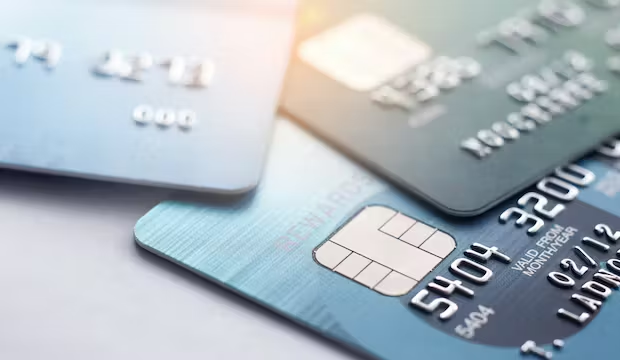

In [356]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [357]:
train_data = pd.read_csv('train_data.csv')

test_data = pd.read_csv('test_data.csv')


In [358]:
train_data.head()


,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [359]:
test_data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [360]:
test_data.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [361]:
train_data['Job title'].fillna("No Job", inplace = True)
test_data['Job title'].fillna("No Job", inplace = True)


In [362]:
test_data.isnull().sum()

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

In [363]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [364]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [365]:
train_data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,No Job,1.0,-41.0,0


In [366]:
train_data['Is high risk'].value_counts()

0    28666
1      499
Name: Is high risk, dtype: int64

In [367]:
test_data['Is high risk'].value_counts()

0    7175
1     117
Name: Is high risk, dtype: int64

In [368]:
train_data['approval status'] = np.where(train_data['Is high risk'] == 0, 1, 0)

In [369]:
test_data['approval status'] = np.where(test_data['Is high risk'] == 0, 1, 0)

In [370]:
test_data['approval status'].value_counts(),train_data['approval status'].value_counts()

(1    7175
 0     117
 Name: approval status, dtype: int64,
 1    28666
 0      499
 Name: approval status, dtype: int64)

In [371]:
train_data['approval status'] = train_data['approval status'].astype('int64')
test_data['approval status'] = test_data['approval status'].astype('int64')

In [372]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

# As we were given high risk as a targetted variable where
### 0 = No risk 
### 1 = high risk
### In the Dataset if there is value '0' means there is no risk and CC will be approved and vice-versa
# Hence we created an approval status column and there is no need of risk column anymore



In [373]:
test_data = test_data.drop('Is high risk',axis = 1)

In [374]:
train_data = train_data.drop('Is high risk',axis = 1)

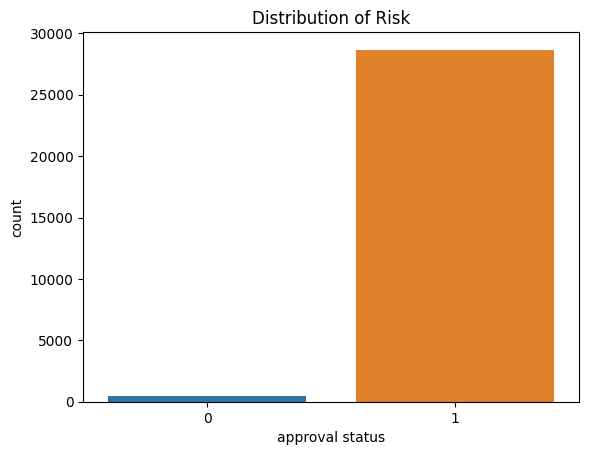

In [375]:
# Univariate Analysis
# Plot distribution of the target variable
sns.countplot(x='approval status', data=train_data)
plt.title('Distribution of Risk')
plt.show()



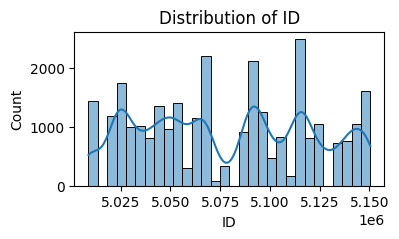

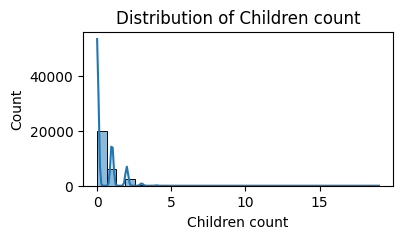

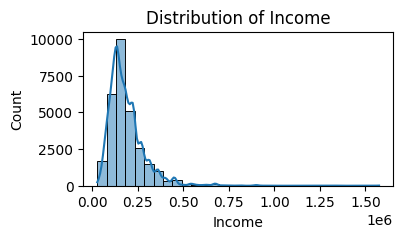

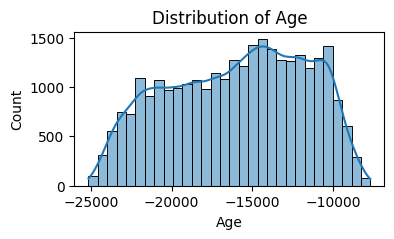

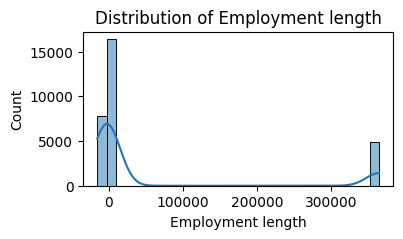

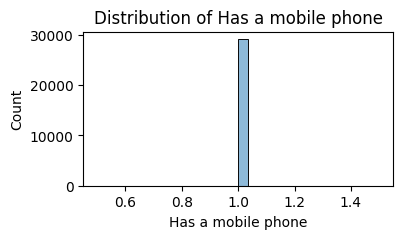

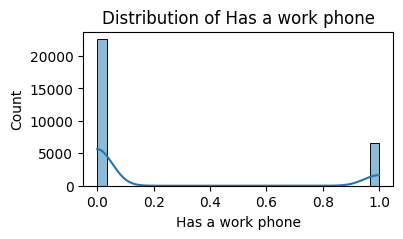

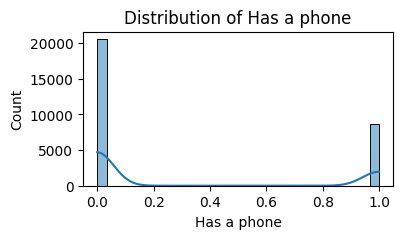

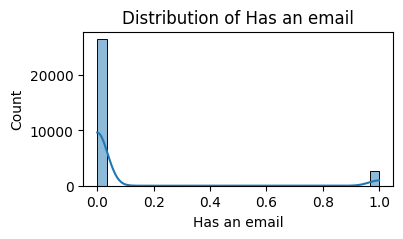

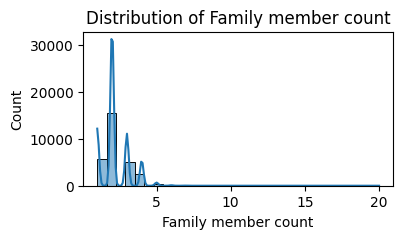

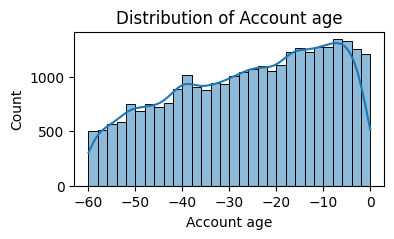

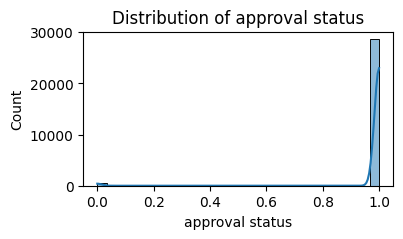

In [376]:
# Explore distribution of numerical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(4, 2))
    sns.histplot(train_data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

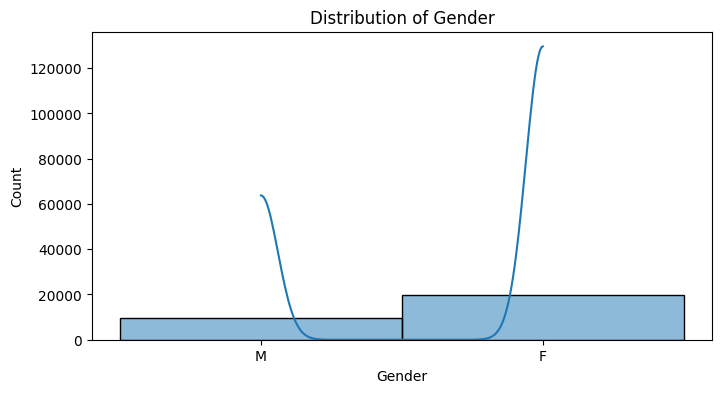

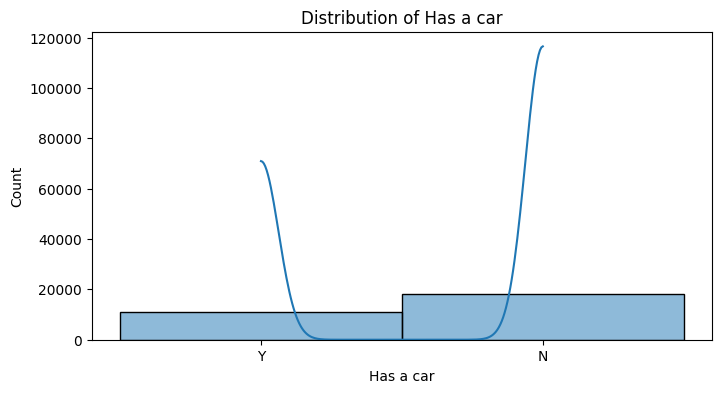

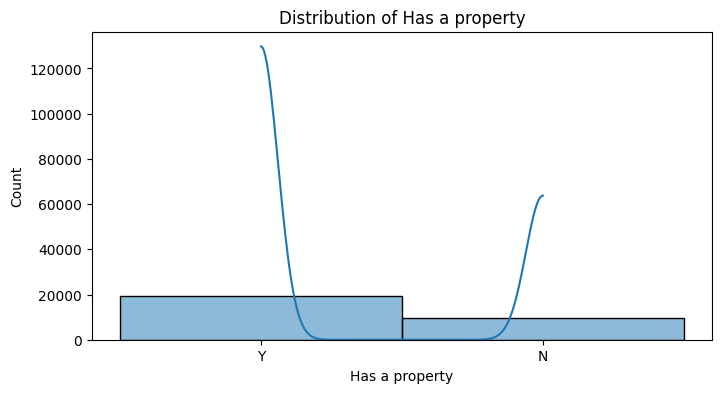

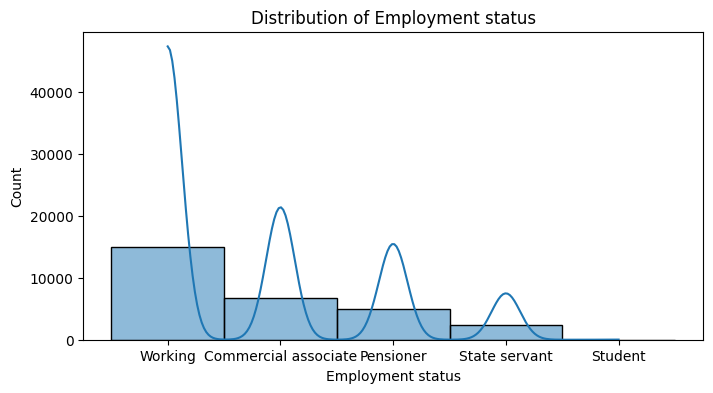

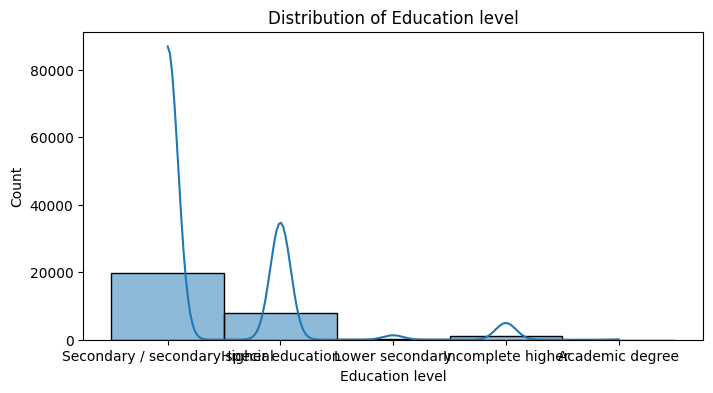

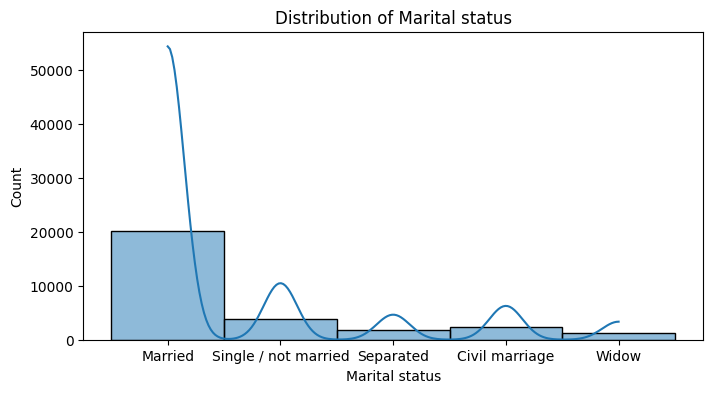

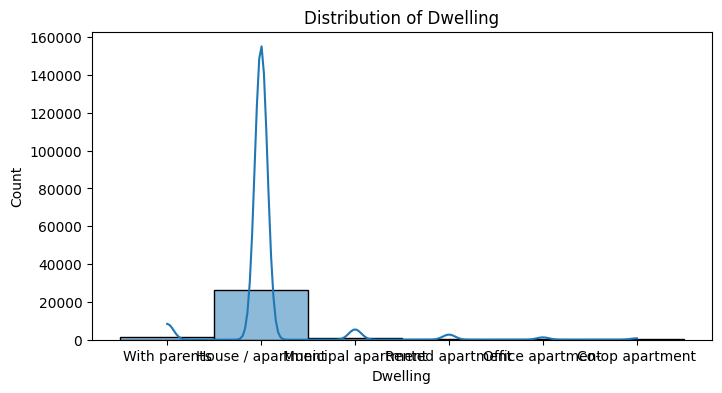

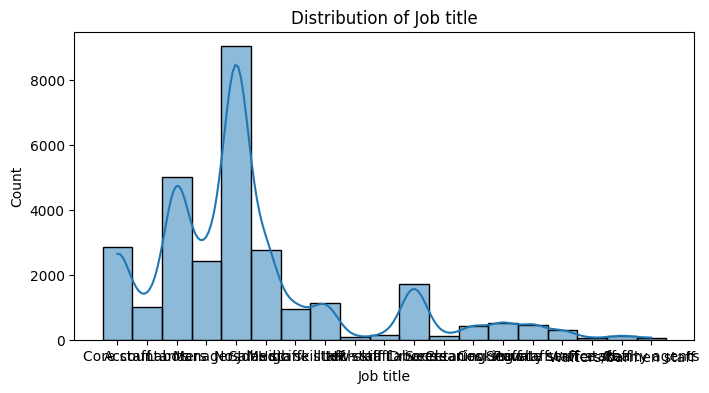

In [377]:
# Explore distribution of numerical features
numerical_features = train_data.select_dtypes(include=['object']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

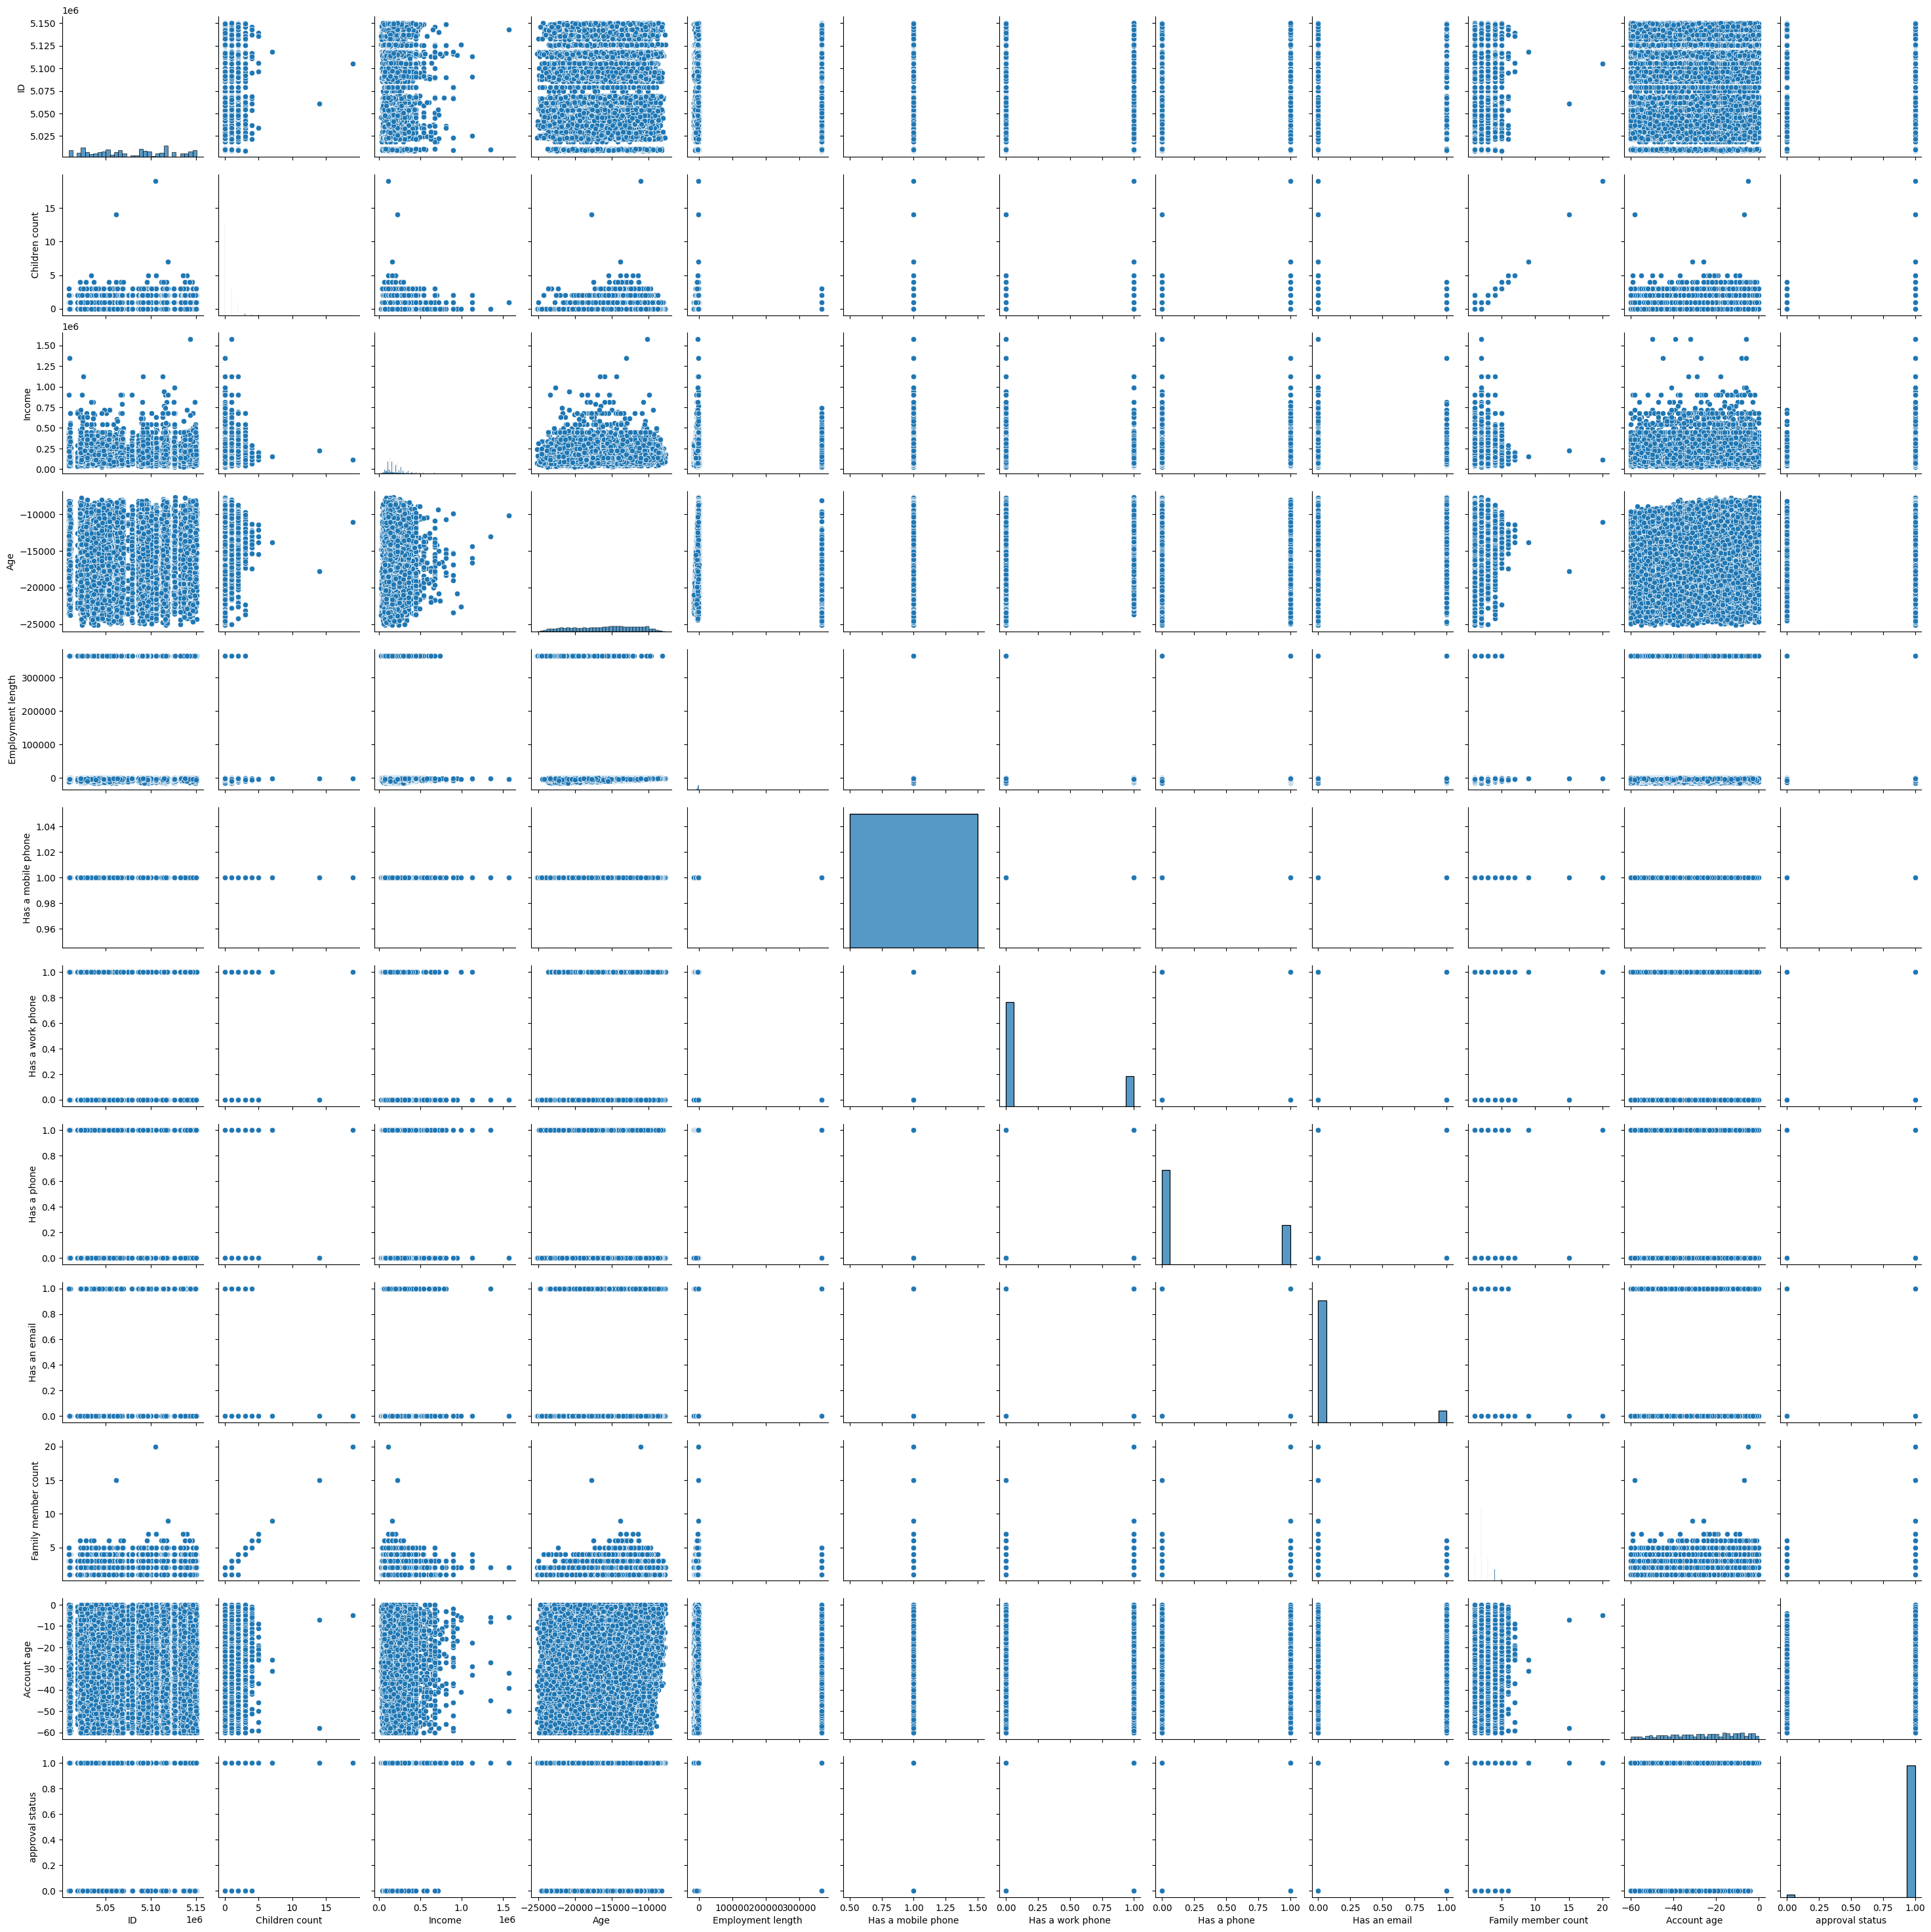

In [378]:
# Bivariate Analysis
# Correlation heatmap for numerical features
numerical_features_int = train_data.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(train_data[numerical_features_int])
plt.show()



In [379]:
correlation_matrix = train_data[numerical_features_int].corr()
print(correlation_matrix)

                           ID  Children count    Income       Age  \
ID                   1.000000        0.026291 -0.016257  0.053120   
Children count       0.026291        1.000000  0.034991  0.339080   
Income              -0.016257        0.034991  1.000000  0.068156   
Age                  0.053120        0.339080  0.068156  1.000000   
Employment length   -0.037380       -0.230468 -0.169940 -0.616299   
Has a mobile phone        NaN             NaN       NaN       NaN   
Has a work phone     0.085670        0.048727 -0.036601  0.177483   
Has a phone          0.013915       -0.015110  0.021516 -0.027621   
Has an email        -0.048210        0.015116  0.091500  0.104728   
Family member count  0.024724        0.888676  0.025338  0.301941   
Account age         -0.001453       -0.003722 -0.016435  0.057467   
approval status     -0.011941       -0.000369  0.001760 -0.002422   

                     Employment length  Has a mobile phone  Has a work phone  \
ID                    

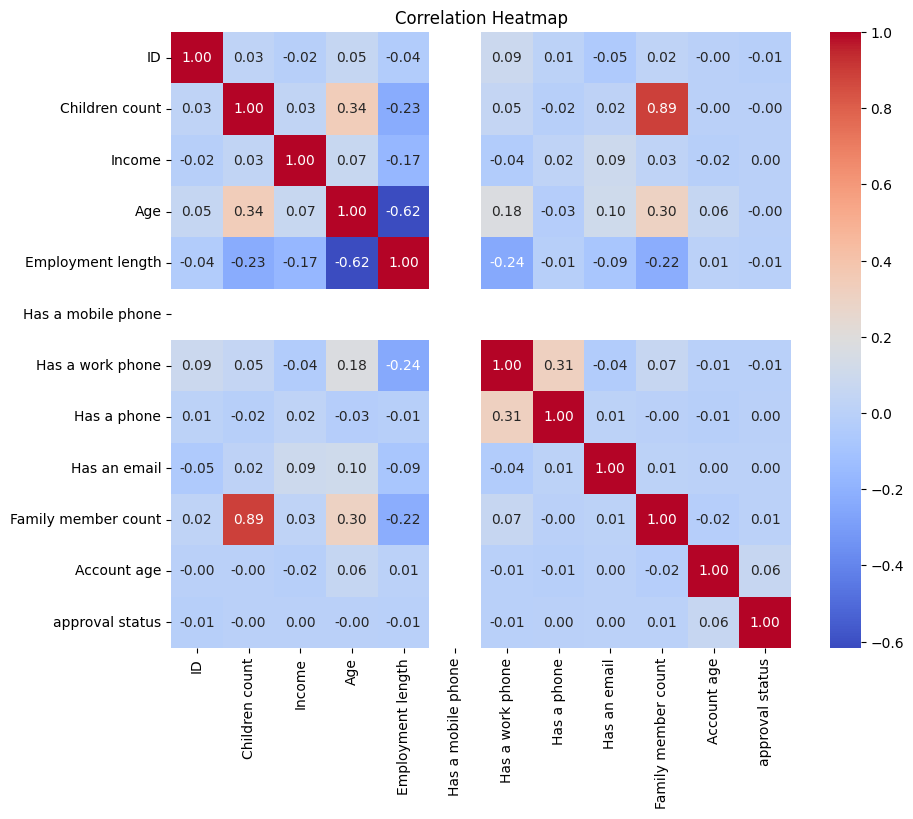

In [380]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


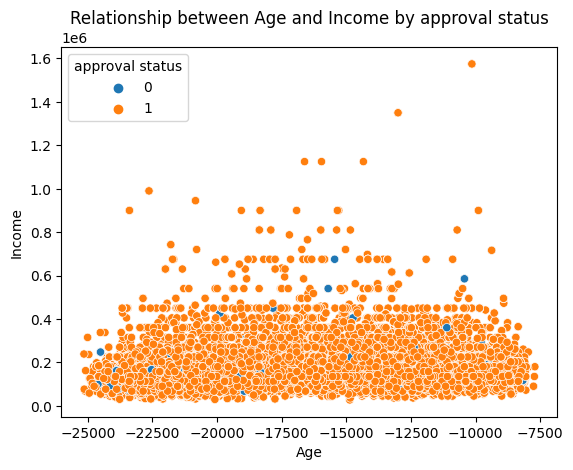

In [381]:
# Explore relationships between selected features
selected_features = ['Age', 'Income']
sns.scatterplot(x=selected_features[0], y=selected_features[1], hue='approval status', data=train_data)
plt.title(f'Relationship between {selected_features[0]} and {selected_features[1]} by approval status')
plt.show()


In [382]:
train_data.isnull().sum()
#OUR Database has no NULL VALUES

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
approval status        0
dtype: int64

In [383]:
train_data.select_dtypes("object")

,Gender,Has a car,Has a property,Employment status,Education level,Marital status,Dwelling,Job title
0,M,Y,Y,Working,Secondary / secondary special,Married,With parents,Core staff
1,F,Y,N,Commercial associate,Higher education,Single / not married,House / apartment,Accountants
2,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers
3,F,Y,Y,Commercial associate,Higher education,Single / not married,House / apartment,Managers
4,F,N,N,Working,Secondary / secondary special,Separated,House / apartment,No Job
...,...,...,...,...,...,...,...,...
29160,F,N,Y,Pensioner,Secondary / secondary special,Single / not married,House / apartment,No Job
29161,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Core staff
29162,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Managers
29163,F,N,Y,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,No Job


In [384]:
train_data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,approval status
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,1
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,1
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,1
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,1
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,No Job,1.0,-41.0,1


In [385]:
X_train = train_data.drop(['approval status','ID'], axis=1)
y_train = train_data['approval status']

X_test = test_data.drop(['approval status','ID'], axis=1)
y_test = test_data['approval status']


In [386]:
X_train = pd.get_dummies(X_train, columns=['Job title','Employment status','Gender','Has a car','Has a property','Education level','Marital status','Dwelling'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Job title','Employment status','Gender','Has a car','Has a property','Education level','Marital status','Dwelling'], drop_first=True)


In [387]:
from sklearn.preprocessing import StandardScaler

In [388]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [389]:
X_test.head()

,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,...,Education level_Secondary / secondary special,Marital status_Married,Marital status_Separated,Marital status_Single / not married,Marital status_Widow,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents
0,-0.580682,0.153929,-0.203316,-0.442777,0.0,-0.53775,-0.646833,-0.315022,-1.312833,1.221474,...,1,0,1,0,0,1,0,0,0,0
1,-0.580682,4.813329,-0.510721,-0.437372,0.0,-0.53775,1.545994,-0.315022,-0.216550,0.614914,...,0,1,0,0,0,1,0,0,0,0
2,-0.580682,0.464556,-1.424608,-0.468370,0.0,-0.53775,-0.646833,3.174385,-0.216550,-1.568701,...,0,0,0,0,0,1,0,0,0,0
3,-0.580682,2.550192,0.833343,-0.433798,0.0,-0.53775,-0.646833,-0.315022,-0.216550,-1.690013,...,0,1,0,0,0,1,0,0,0,0
4,-0.580682,0.375805,0.909956,-0.435330,0.0,-0.53775,-0.646833,-0.315022,-0.216550,-1.326077,...,1,1,0,0,0,0,1,0,0,0


In [390]:
X_train.head()

,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,...,Education level_Secondary / secondary special,Marital status_Married,Marital status_Separated,Marital status_Single / not married,Marital status_Widow,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents
0,-0.580682,-0.511700,-0.069362,-0.453085,0.0,-0.53775,-0.646833,-0.315022,-0.216550,0.554258,...,1,1,0,0,0,0,0,0,0,1
1,0.767264,-0.511700,1.391763,-0.442479,0.0,-0.53775,-0.646833,-0.315022,-0.216550,1.524754,...,0,0,0,1,0,1,0,0,0,0
2,2.115210,-0.067947,0.751495,-0.471581,0.0,-0.53775,-0.646833,-0.315022,1.976016,-0.719517,...,1,1,0,0,0,1,0,0,0,0
3,-0.580682,1.707062,-1.177637,-0.445348,0.0,-0.53775,-0.646833,3.174385,-1.312833,0.918194,...,0,0,0,1,0,1,0,0,0,0
4,-0.580682,0.819558,-0.054134,-0.434226,0.0,-0.53775,1.545994,-0.315022,-1.312833,-0.901485,...,1,0,1,0,0,1,0,0,0,0


In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [392]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((29165, 48), (29165,), (7292, 48), (7292,))

# Logistic Regression

In [393]:
log = LogisticRegression()
log.fit(X_train, y_train)
logistic_predictions = log.predict(X_test)


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [394]:
print("The accuracy score of Logistic Regression is: {:.2f}% ".format(accuracy_score(logistic_predictions,y_test)*100))

The accuracy score of Logistic Regression is: 98.42% 


In [395]:
print(classification_report(y_test, logistic_predictions))


              precision    recall  f1-score   support

           0       1.00      0.02      0.03       117
           1       0.98      1.00      0.99      7175

    accuracy                           0.98      7292
   macro avg       0.99      0.51      0.51      7292
weighted avg       0.98      0.98      0.98      7292



# Decision Trees


In [396]:
dec = DecisionTreeClassifier()
dec.fit(X_train,y_train)
dec_pred = dec.predict(X_test)

In [397]:
print("The accuracy score of Decision Tree is: {:.2f}% ".format(accuracy_score(dec_pred,y_test)*100))

The accuracy score of Decision Tree is: 96.85% 


In [398]:
print(classification_report(y_test, dec_pred))


              precision    recall  f1-score   support

           0       0.15      0.21      0.18       117
           1       0.99      0.98      0.98      7175

    accuracy                           0.97      7292
   macro avg       0.57      0.60      0.58      7292
weighted avg       0.97      0.97      0.97      7292



# Random Forest

In [399]:
rand = RandomForestClassifier()
rand.fit(X_train,y_train)
rand_pred = rand.predict(X_test)

In [400]:
print("The accuracy score of Random Forest is: {:.2f}% ".format(accuracy_score(rand_pred,y_test)*100))

The accuracy score of Random Forest is: 98.15% 


In [401]:
print(classification_report(y_test, rand_pred))


              precision    recall  f1-score   support

           0       0.32      0.14      0.19       117
           1       0.99      1.00      0.99      7175

    accuracy                           0.98      7292
   macro avg       0.65      0.57      0.59      7292
weighted avg       0.98      0.98      0.98      7292



# Gradient Boost

In [402]:
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)


In [403]:
print("The accuracy score of Gradient boosting is: {:.2f}% ".format(accuracy_score(gradient_boosting_predictions,y_test)*100))

The accuracy score of Gradient boosting is: 98.40% 


In [404]:
print(classification_report(y_test, gradient_boosting_predictions))


              precision    recall  f1-score   support

           0       0.50      0.03      0.06       117
           1       0.98      1.00      0.99      7175

    accuracy                           0.98      7292
   macro avg       0.74      0.52      0.53      7292
weighted avg       0.98      0.98      0.98      7292



In [405]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [406]:
def evaluate_model(model_name, y_train, y_pred):
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    confusion_mat = confusion_matrix(y_train, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")


In [407]:
evaluate_model("Logistic Regression", y_test, logistic_predictions)


Accuracy: 0.9842292923752057
Precision: 0.9842249657064472
Recall: 1.0
F1 Score: 0.9920497753197374


In [408]:
evaluate_model("Gradient Boosting", y_test, gradient_boosting_predictions)

Accuracy: 0.9839550191991223
Precision: 0.9844865458539264
Recall: 0.9994425087108014
F1 Score: 0.9919081540908777


In [409]:
evaluate_model("Decision Tree", y_test, dec_pred)


Accuracy: 0.9684585847504114
Precision: 0.9870949642306074
Recall: 0.980766550522648
F1 Score: 0.983920581655481


In [410]:
evaluate_model("Random Forest", y_test, rand_pred)


Accuracy: 0.9814865606143719
Precision: 0.9860535763601215
Recall: 0.9952613240418119
F1 Score: 0.9906360546576959


# We can see that Logistic Regression is the most accurate and precise

In [411]:
log_probs = log.predict_proba(X_test)[:, 1]
log_pred = log.predict(X_test)


In [412]:
# Get feature importance scores from the logistic regression model
feature_importance = log.coef_[0]

In [413]:
feature_importance_df = pd.DataFrame({'Income': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance Scores:")
print(feature_importance)

Feature Importance Scores:
[ 0.56264471  0.0179902  -0.09280238  1.49890732  0.         -0.01004388
  0.02118409  0.0322046  -0.71924466  0.49435009  0.25573668  0.31360491
 -0.1853521  -0.20040747  0.19659697 -0.37275309 -0.94364529  0.14384071
 -0.57398742  0.0757606   0.42528578  0.12775322  0.85598467  0.50664096
  0.09527732 -0.04744487 -0.23147966  0.36129645 -4.32926499  0.46670644
  0.1042935   0.04548588 -0.29480656  0.17198827  0.37281327  0.09972315
 -0.06697211 -0.35442358  0.12745426  0.04572675 -0.6517034  -1.11499249
 -1.40910454  0.03481883 -0.34987075 -0.3416794   0.03027859  0.24766626]


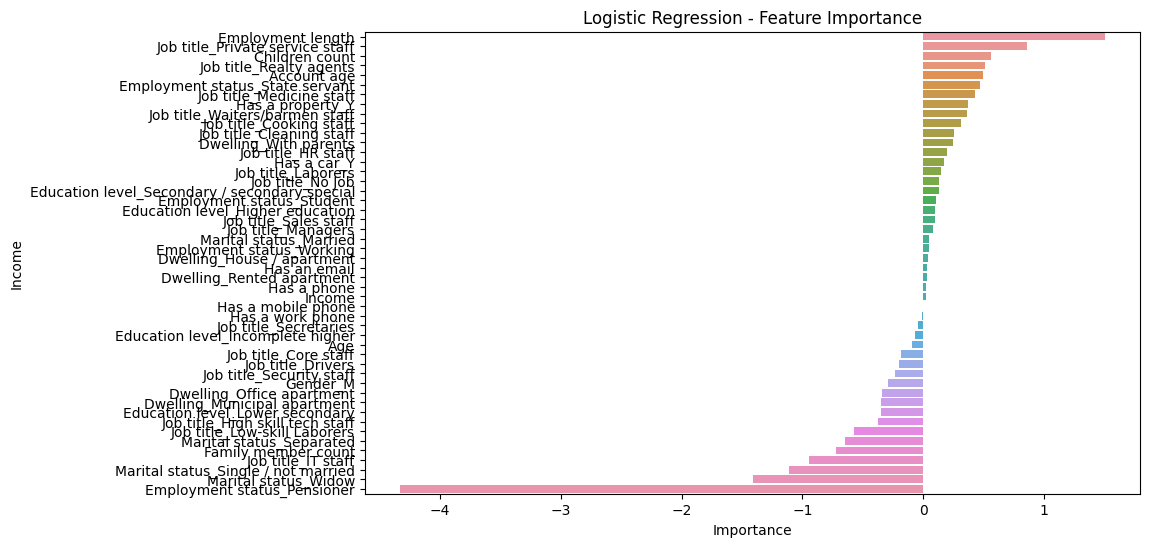

In [414]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Income', data=feature_importance_df)
plt.title('Logistic Regression - Feature Importance')
plt.show()

In [415]:
prediction_results = pd.DataFrame({'Actual': y_test, 'Predicted': log_pred, 'Probability': log_probs})
print(prediction_results.head())

   Actual  Predicted  Probability
0       1          1     0.997666
1       1          1     0.988951
2       1          1     0.976421
3       1          1     0.978457
4       1          1     0.965481


# Key Features Driving Approvals/Denials:
Features with higher importance scores, as they have a more significant impact on the model's predictions.
Here, Job title and employment length have more +ve impact
and marital status and family member count have more -ve impact

# Continuous Monitoring and Model Updating:

Regularly monitor the model's performance over time and update it as needed. The credit landscape and risk factors may change, and it's important to ensure that the model remains accurate and effective.